In [ ]:
# | hide
import nbdev
from nbdev.showdoc import *

nbdev.nbdev_export()

In [ ]:
# |export
import os
import requests
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
#| default_exp utils.datasets

In [ ]:
#| export
def download_file(url, path):
    dir_path = os.path.dirname(path)

    os.makedirs(dir_path, exist_ok=True)
    if not os.path.exists(path):
        response = requests.get(url)
        with open(path, "wb") as f:
            f.write(response.content)


def load_mnist(path="../datasets/mnist/"):
    download_file(
        "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz",
        os.path.join(path, "mnist.npz"),
    )
    with np.load(os.path.join(path, "mnist.npz")) as f:
        x_train, y_train = f["x_train"], f["y_train"]
        x_test, y_test = f["x_test"], f["y_test"]
    return (x_train, y_train), (x_test, y_test)

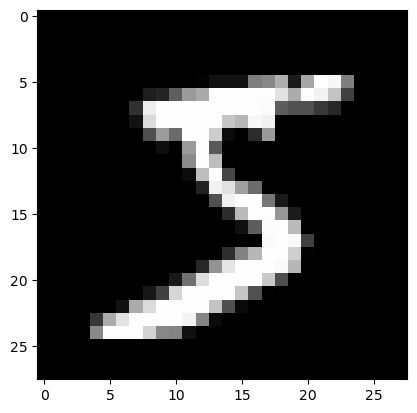

In [ ]:
# | eval: false

# XXX Find a way to cache the fs on github CI to avoid downloading the file every time
(x_train, y_train), (x_test, y_test) = load_mnist()

plt.imshow(x_train[0], cmap="gray");